# Convolutional Neural Network: 
This module use a convolutional neural network from a dataset that has image data about clothes and in order to predict 

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
fashion_mnist = keras.datasets.fashion_mnist  #get the data
(train_images, train_label), (test_images, test_label) = fashion_mnist.load_data() #getting the training and testing images

In [49]:
test_images.shape

(10000, 28, 28)

In [50]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']


In [51]:
train_images.shape
test_images.shape

(10000, 28, 28)

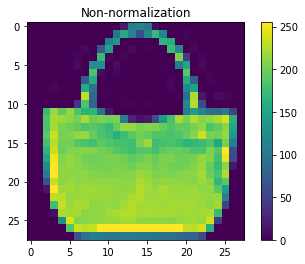

In [52]:
#let see how the figures look
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.title('Non-normalization')
plt.show()


### Normalization:
The color scale is between 0-255, when we divide between 255 we normalized the scale between 0 and 1. This is important because gives a computational advantage.

In [53]:
train_images = train_images / 255.0
test_images = test_images/ 255.0

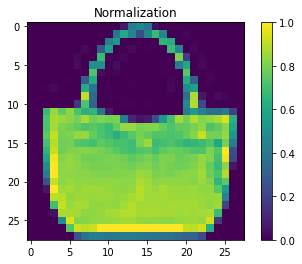

In [54]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.title('Normalization')
plt.show()

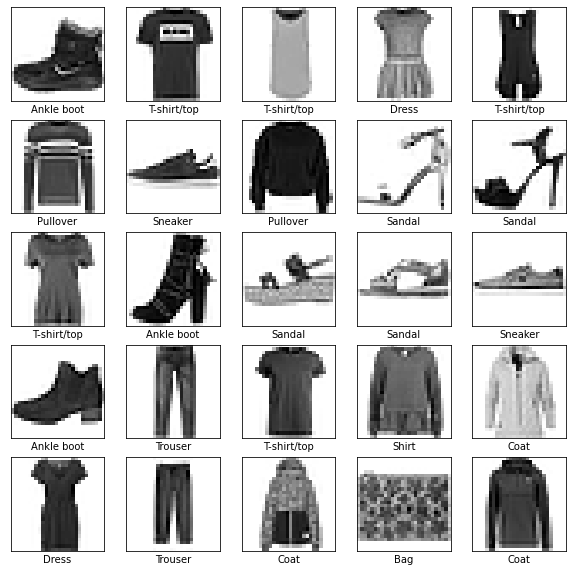

In [55]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_name[train_label[i]])

#### Model definition and training
We use keras and put the different arguments:
1. keras layers flatten: have to do with the layers of the neural network
2. keras layers dense: has to do with the density that is to say, the model can obtain the shapes

In [56]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10,activation=tf.nn.softmax)])  #capas de red neuronal

In [57]:
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy']) #compilamos el modelo

In [58]:
model.fit(x=train_images, y=train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4991 - accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3736 - accuracy: 0.8665
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3354 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3108 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2937 - accuracy: 0.8924


In [59]:
test_loss, test_acc = model.evaluate(x=test_images,y= test_label)
print('Accuracy ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8764
Accuracy  0.8763999938964844


In [61]:
predictions = model.predict(test_images)

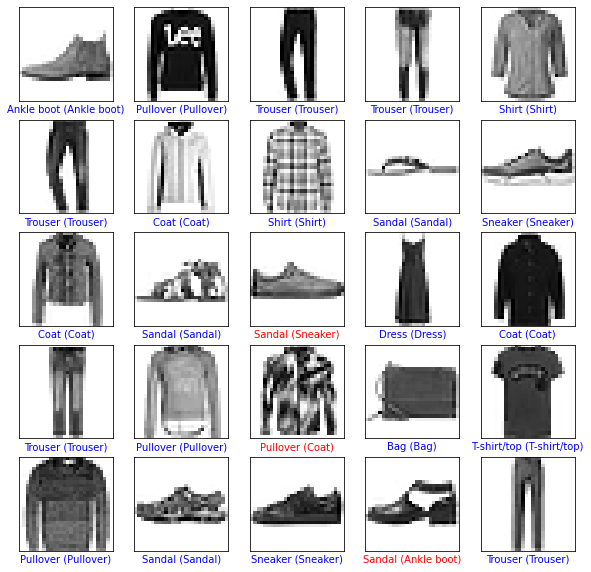

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_label[i]
    if predicted_label == true_label:
        color ='blue'
    else:
        color='red'
    
    plt.xlabel('{} ({})'.format(class_name[predicted_label],class_name[true_label]), color=color)
